# Exercise 6.6 Distance Travelled to Buy Toilet Paper

Suppose that you are on a quest to buy toilet paper for your household. There is a list of stores that you plan to visit in a given order, and you will come home as soon as you find a store that has toilet paper in stock. The question asks you to build a simulation model of the total distance you travel on your quest.

**Write a function called "travel_distance" with the following input arguments:**

- **locations**: a list in which each element represents the location of a distinct retails store, given as a two-element list of the x and y coordinates. For example, if the list is `[[3,4],[-3,4],[-8,6]]`, then the first store you plan to visit is at location $(x,y)=(3,4)$, the second store at $(-3,4)$, and the third store at $(-8,6)$. Assume that your home is located at $(x,y)=(0,0)$. 
- **probabilities**: a list of numbers between 0 and 1 (inclusive). You can assume that the length of this list is the same as the length of the list "locations", and each element represents the probability that the corresponding store has toilet paper in stock. 

For simplicity, assume that you travel the minimum distance between any two points, so that the distance between coordinates $(x_1, y_1)$ and $(x_2,y_2)$ is $\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$. Moreover, whether toilet paper is in stock is independent across stores. 

**Your function should return one number, which is the total distance travelled on your trip, starting from home and counting all distances travelled until you return to home.** When you find that toilet paper is not in stock at a store, you travel directly to the next store. You return to home only after you have found toilet paper, or after you have gone through all of the stores (in which case you return home empty handed). See the sample outputs for illustrations. Note that the returned number is deterministic if all probabilities are either 0 or 1 (as in test codes 1-4), but should be random otherwise (as in test code 5).

In [7]:
# Final Solution
from numpy.random import default_rng
rng=default_rng()
import math
def travel_distance(locations,probs):
    prev_loc = [0,0]
    dist_travel = 0
    for i in range(len(locations)):
        dist_travel += math.sqrt((locations[i][0]-prev_loc[0])**2+(locations[i][1]-prev_loc[1])**2)
        avail = rng.choice(['A','NA'],p = [probs[i],1-probs[i]])
        if avail == 'A':
            dist_travel += math.sqrt((locations[i][0])**2+(locations[i][1])**2)
            break
        else:
            prev_loc = locations[i]
        if i == len(locations)-1:
            dist_travel += math.sqrt((locations[i][0])**2+(locations[i][1])**2)
    return(dist_travel)


In [8]:
# Test code 1
travel_distance([[3,4],[-3,4],[-8,6]],[0,1,1])

16.0

In [9]:
# Test code 2
print(travel_distance([[3,4],[-3,4],[-8,6]],[1,1,0]))

10.0


In [10]:
# Test code 3
travel_distance([[3,4],[-3,4],[-8,6]],[0,0,1])

26.385164807134505

In [11]:
# Test code 4
travel_distance([[3,4],[-3,4],[-8,6]],[0,0,0])

26.385164807134505

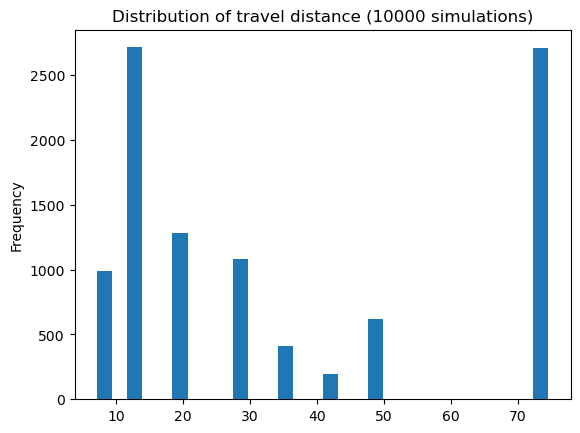

Mean: 35.17
Standard deviation: 26.13


In [13]:
# Test code 5
locations=[[3,2],[5,4],[7,-1],[5,-8],[-5,-4],[-6,2],[-8,4],[-20,10]]
probabilities=[0.1,0.3,0.2,0.2,0.1,0.05,0.2,0.05]
import pandas as pd
import matplotlib.pyplot as plt
distances=pd.Series([travel_distance(locations,probabilities) for i in range(10000)])
distances.plot(kind='hist',bins=30,title='Distribution of travel distance (10000 simulations)')
plt.show()
print('Mean:',round(distances.mean(),2))
print('Standard deviation:',round(distances.std(),2))